In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
from sys import platform
import os
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
from utils import *

In [2]:
vol_file = Path('../Voltron_data/Voltron_Log_DRN_Exp.csv')
dat_xls_file = pd.read_csv(vol_file, index_col=0)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')
# using Path to handle switches filesystems
if platform == "linux" or platform == "linux2":
    dir_folder = Path('/nrs/ahrens/Ziqiang/Takashi_DRN_project/ProcessedData/')
elif platform == 'win32':
    dir_folder = Path('U:\\Takashi') # put folder for windows system

vol_file = Path('analysis_sections_based_on_swim_pattern.csv')
dat_xls_file = pd.read_csv(vol_file, index_col=0)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')

### High-low gain activity in swim bouts

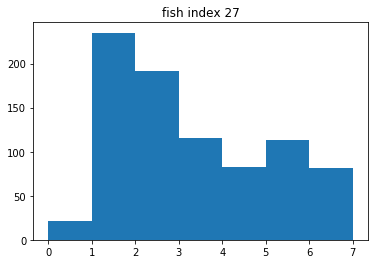

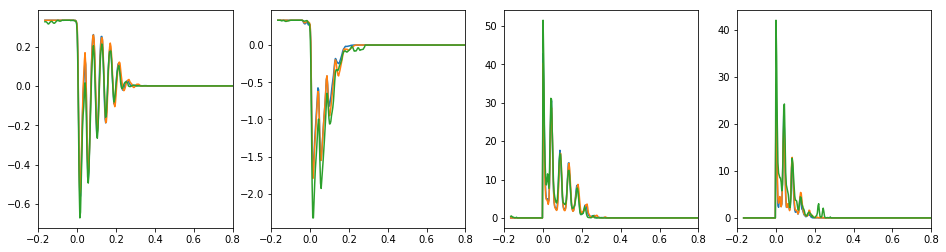

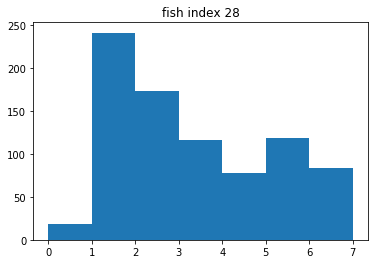

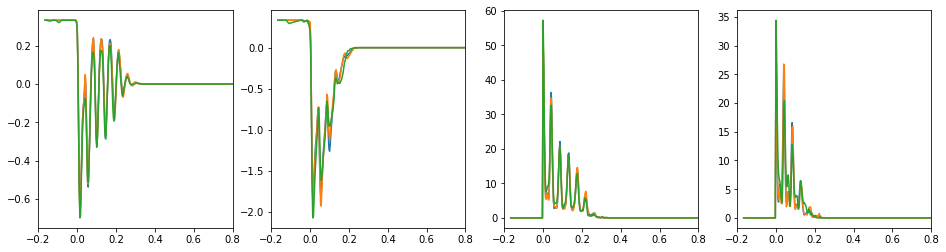

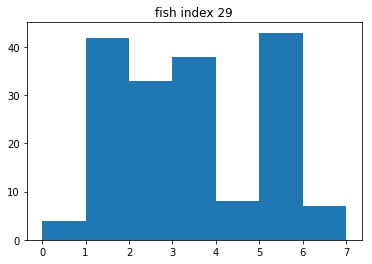

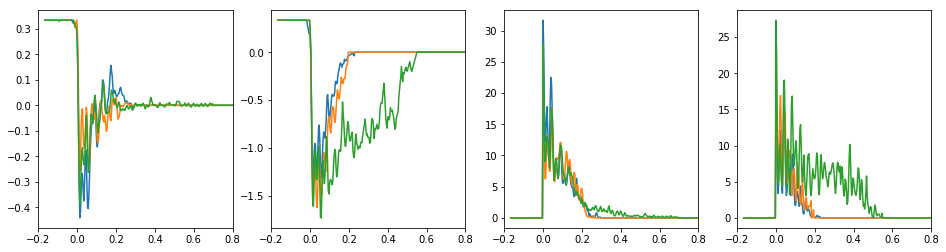

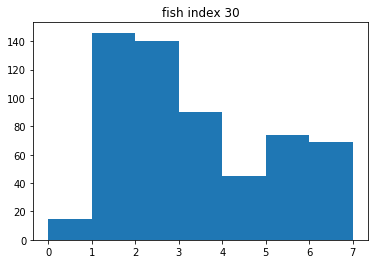

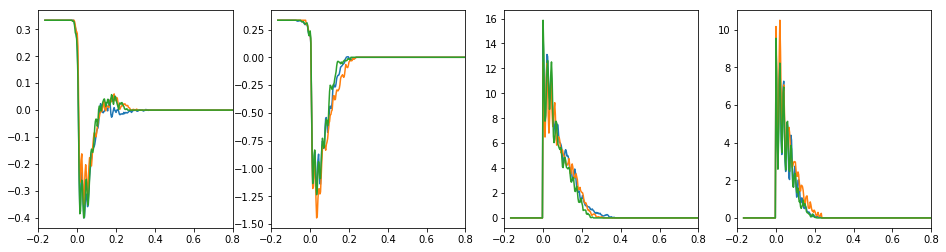

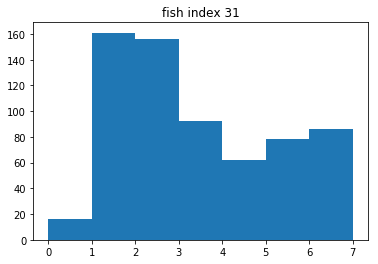

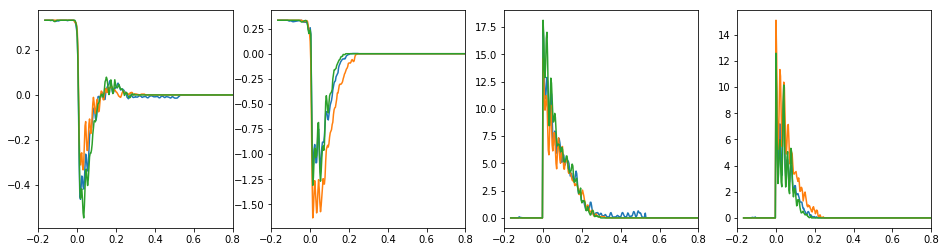

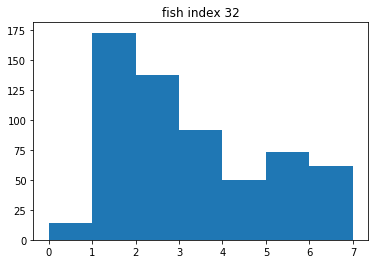

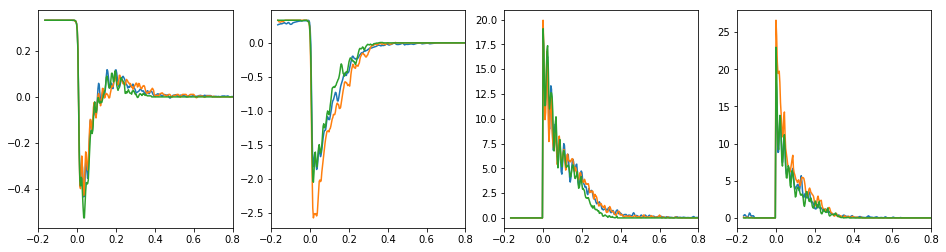

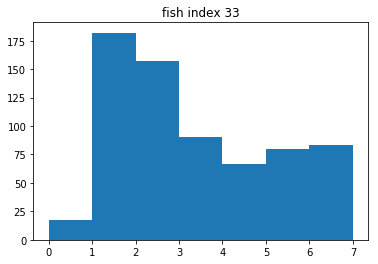

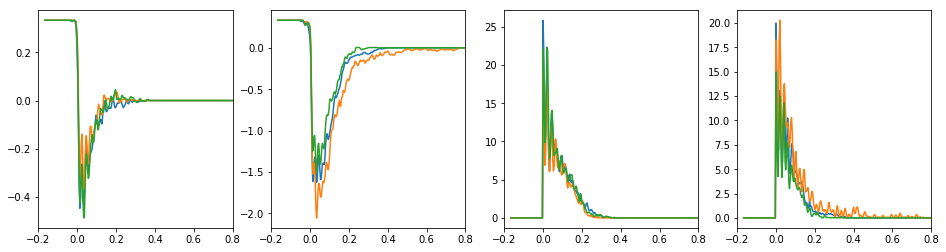

In [15]:
k_ = boxcarKernel(sigma=60)
row_ = -1
for _, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    row_ = row_+1
    if 'Optovin' not in row['task']:
        continue
    dat_dir = dir_folder/f'{folder}/{fish}/Data/'
    swim_dir = dir_folder/f'{folder}/{fish}/swim/'
    dff = np.load(dat_dir/'Voltr_spikes.npz')['voltrs']
    dff = dff - np.nanmedian(dff, axis=1, keepdims=True)
    spk = np.load(dat_dir/'Voltr_spikes.npz')['spk']
    num_cell = spk.shape[0]
    # spk with padding zeros for the first 2 seconds
    spk = np.r_['-1', np.zeros((num_cell, 600)), spk]
    frame_stimParams = np.load(swim_dir/'frame_stimParams.npy')
    frame_swim_tcourse = np.load(swim_dir/'frame_swim_tcourse.npy')

    _ = np.load(f'swim_power/{folder}_{fish}_swim_dat.npz')
    swim_starts = _['swim_starts']
    swim_ends = _['swim_ends']
    r_swim = _['r_swim']
    l_swim = _['l_swim']
    visu = _['visu']
    p_swim = np.sqrt(r_swim**2+l_swim**2)
    
    task_period = frame_stimParams[2,swim_starts] # 1, low; 2 high
    task_period = task_period + frame_stimParams[3,swim_starts]*2 -2 # 
    opto_ = frame_stimParams[5]
    opto_t = np.where(opto_)[0]
    for n_ in range(len(swim_starts)):
        if (swim_starts[n_]>opto_t).sum() == 0:
            continue
        if swim_starts[n_] - opto_t[swim_starts[n_]>opto_t][-1]<10*300:
            task_period[n_] = task_period[n_] + 2
        if (swim_starts[n_]<opto_t).sum() == 0:
            continue
        if swim_starts[n_] - opto_t[swim_starts[n_]<opto_t][0]>-300:
            task_period[n_] = 0
    
    plt.hist(task_period, bins=range(8))
#     plt.title(f'{folder}/{fish}')
    plt.title(f'fish index {row_}')
    plt.show()
    
    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    for n_ in range(2):
        ax[n_].plot(np.arange(300)/300-50/300, visu[task_period==n_+1].mean(axis=0))
        ax[n_].plot(np.arange(300)/300-50/300, visu[task_period==n_+3].mean(axis=0))
        ax[n_].plot(np.arange(300)/300-50/300, visu[task_period==n_+5].mean(axis=0))
        ax[n_].set_xlim([-0.2, 0.8])
    
    for n_ in range(2):
        ax[n_+2].plot(np.arange(300)/300-50/300, p_swim[task_period==n_+1].mean(axis=0))
        ax[n_+2].plot(np.arange(300)/300-50/300, p_swim[task_period==n_+3].mean(axis=0))
        ax[n_+2].plot(np.arange(300)/300-50/300, p_swim[task_period==n_+5].mean(axis=0))
        ax[n_+2].set_xlim([-0.2, 0.8])
    plt.show()

In [16]:
k_ = boxcarKernel(sigma=100)
ave_low_list = []
ave_high_list = []
row_ = 0
# for _, row in dat_xls_file.iterrows():
for nrow in range(31, 34):
    row = dat_xls_file.iloc[nrow]
    folder = row['folder']
    fish = row['fish']
    if 'Optovin' not in row['task']:
        continue
    dat_dir = dir_folder/f'{folder}/{fish}/Data/'
    swim_dir = dir_folder/f'{folder}/{fish}/swim/'
    dff = np.load(dat_dir/'Voltr_spikes.npz')['voltrs']
    dff = dff - np.nanmedian(dff, axis=1, keepdims=True)
    spk = np.load(dat_dir/'Voltr_spikes.npz')['spk']
    num_cell = spk.shape[0]
    # spk with padding zeros for the first 2 seconds
    spk = np.r_['-1', np.zeros((num_cell, 600)), spk]
    frame_stimParams = np.load(swim_dir/'frame_stimParams.npy')
    frame_swim_tcourse = np.load(swim_dir/'frame_swim_tcourse.npy')

    _ = np.load(f'swim_power/{folder}_{fish}_swim_dat.npz')
    swim_starts = _['swim_starts']
    swim_ends = _['swim_ends']
    r_swim = _['r_swim']
    l_swim = _['l_swim']
    visu = _['visu']
    p_swim = np.sqrt(r_swim**2+l_swim**2)
    
    task_period = frame_stimParams[2,swim_starts] # 1, low; 2 high
    task_period = task_period + frame_stimParams[3,swim_starts]*2 -2 # 
    opto_ = frame_stimParams[5]
    opto_t = np.where(opto_)[0]
    for n_ in range(len(swim_starts)):
        if (swim_starts[n_]>opto_t).sum() == 0:
            continue
        if swim_starts[n_] - opto_t[swim_starts[n_]>opto_t][-1]<10*300:
            task_period[n_] = task_period[n_] + 2
        if (swim_starts[n_]<opto_t).sum() == 0:
            continue
        if swim_starts[n_] - opto_t[swim_starts[n_]<opto_t][0]>-300:
            task_period[n_] = 0
       
    for n_cell in range(spk.shape[0]):
        if spk[n_cell].mean()*300 < 0:
            continue
        spk_list = np.zeros((r_swim.shape[0], 400))
        remove_list = np.zeros(r_swim.shape[0]).astype('bool')
        for n, n_swim in enumerate(swim_starts):
            try:
                spk_list[n, :] = spk[n_cell, n_swim-100:n_swim+300]
            except:
                remove_list[n]=True
        spk_list = spk_list[~remove_list, :]
        _ = []
        for n_ in range(6):
            ave_ = spk_list[task_period==n_+1].mean(axis=0)*300
            _.append(smooth(ave_, k_))
        ave_low_list.append(_[0::2])
        ave_high_list.append(_[1::2])

In [17]:
ave_low_list_ = np.array(ave_low_list)
ave_high_list_ = np.array(ave_high_list)

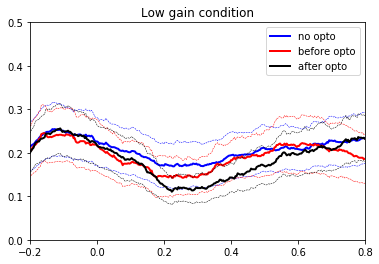

In [18]:
act_list = ave_low_list_
ave_act = np.array(act_list).mean(axis=0)
sem_act = np.array(act_list).std(axis=0)/np.sqrt(len(act_list))
line_spec = ['b', 'r', 'k']
labels = ['no opto', 'before opto', 'after opto']
for n_ in range(3):
    plt.plot(np.arange(400)/300 - 100/300, ave_act[n_], f'-{line_spec[n_]}', lw=2, label=labels[n_])
    plt.plot(np.arange(400)/300 - 100/300, ave_act[n_]+sem_act[n_], f'--{line_spec[n_]}', lw=0.5)
    plt.plot(np.arange(400)/300 - 100/300, ave_act[n_]-sem_act[n_], f'--{line_spec[n_]}', lw=0.5)
plt.xlim([-0.2, 0.8])
plt.ylim([0, 0.5])
plt.title('Low gain condition')
plt.legend()
plt.show()

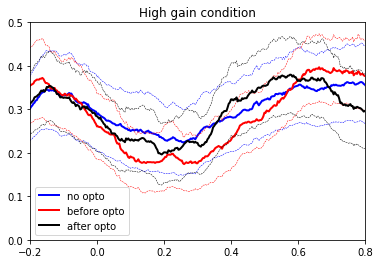

In [19]:
act_list = ave_high_list_
ave_act = np.array(act_list).mean(axis=0)
sem_act = np.array(act_list).std(axis=0)/np.sqrt(len(act_list))
line_spec = ['b', 'r', 'k']
labels = ['no opto', 'before opto', 'after opto']
for n_ in range(3):
    plt.plot(np.arange(400)/300 - 100/300, ave_act[n_], f'-{line_spec[n_]}', lw=2, label=labels[n_])
    plt.plot(np.arange(400)/300 - 100/300, ave_act[n_]+sem_act[n_], f'--{line_spec[n_]}', lw=0.5)
    plt.plot(np.arange(400)/300 - 100/300, ave_act[n_]-sem_act[n_], f'--{line_spec[n_]}', lw=0.5)
plt.xlim([-0.2, 0.8])
plt.ylim([0, 0.5])
plt.title('High gain condition')
plt.legend()
plt.show()

### Neural trace by task epochs

[27, 0, 0.3401430030643514]


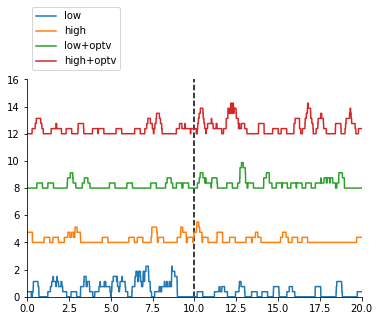

[27, 1, 0.45045965270684374]


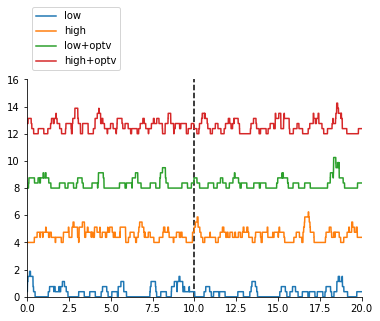

[27, 2, 1.3100102145045964]


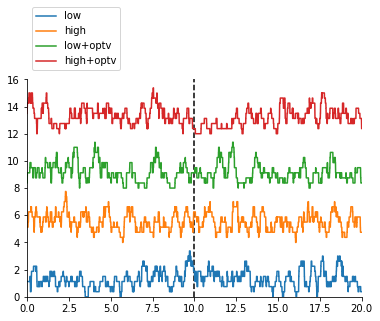

[27, 3, 0.254341164453524]


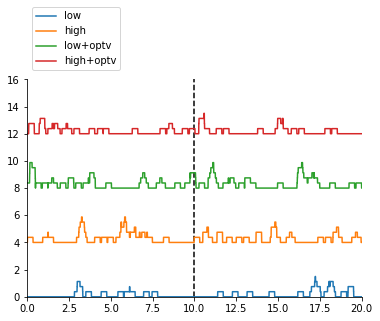

[27, 4, 0.5148110316649642]


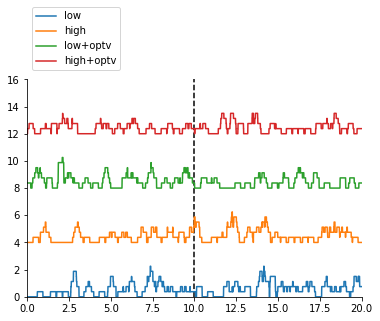

[28, 0, 0.6404494382022472]


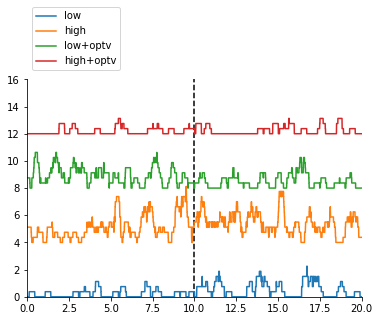

[28, 1, 0.4014300306435138]


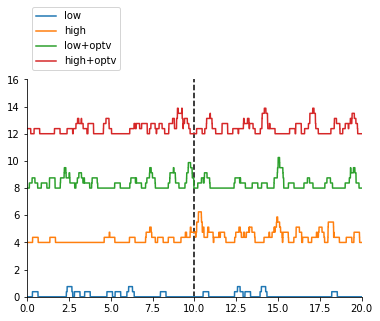

[28, 2, 0.127170582226762]
[28, 3, 0.06435137895812053]
[29, 0, 0.6435137895812053]


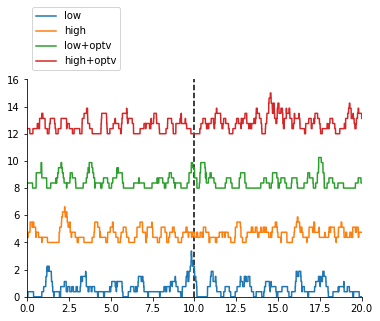

[29, 1, 0.6680286006128702]


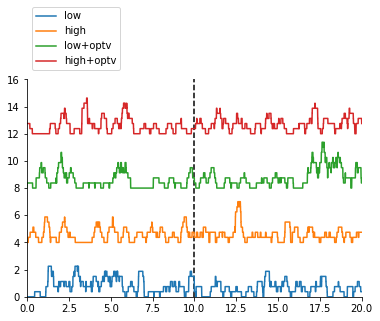

[29, 2, 0.27425944841675176]


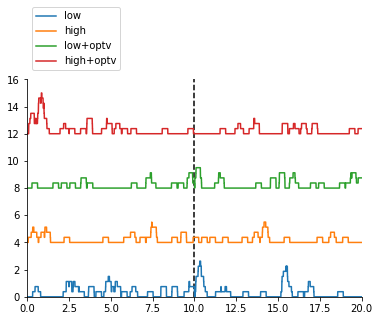

[29, 3, 0.34167517875383047]


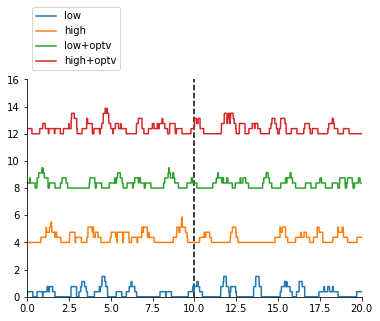

[29, 4, 0.3263534218590398]


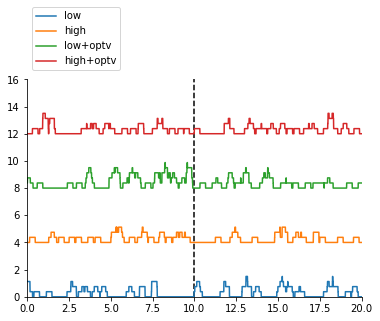

[29, 5, 0.22829417773237998]


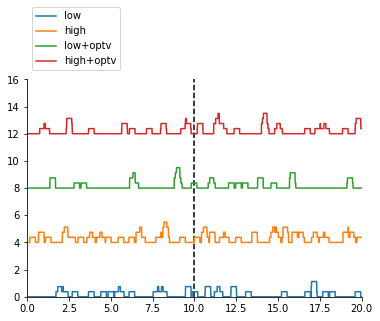

[29, 6, 0.19458631256384065]
[29, 7, 0.06435137895812053]
[29, 8, 0.330949948927477]


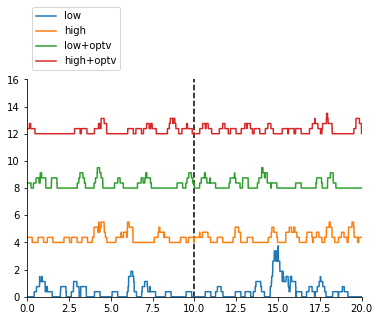

[29, 9, 0.23442288049029622]


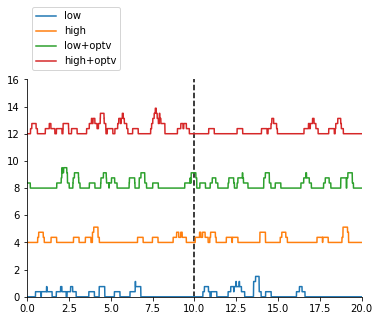

[29, 10, 0.3263534218590398]


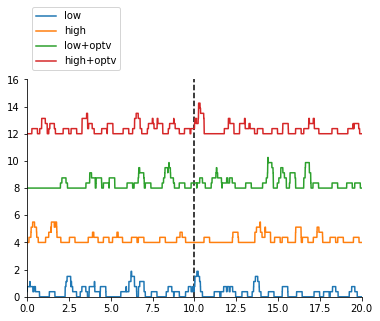

[29, 11, 0.09346271705822268]
[29, 12, 0.06435137895812053]
[29, 13, 0.07660878447395301]
[30, 0, 0.07602635580334516]
[30, 1, 0.2432843385707045]


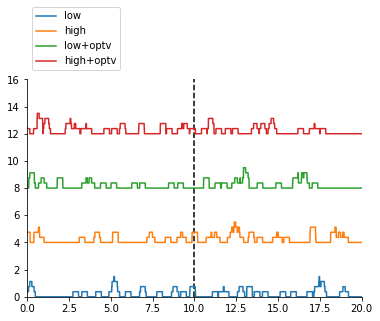

[30, 2, 0.1444500760263558]
[30, 3, 0.3056259503294475]


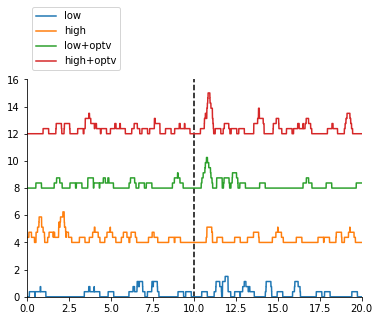

[30, 4, 0.00456158134820071]
[31, 0, 0.006083650190114068]
[31, 1, 0.15817490494296577]
[31, 2, 0.024334600760456272]
[31, 3, 0.20988593155893537]


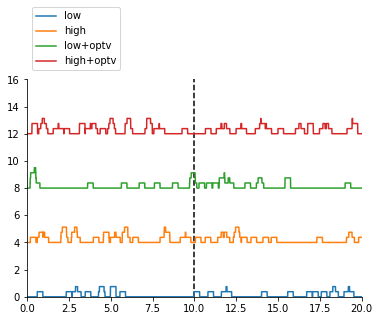

[31, 4, 0.4958174904942966]


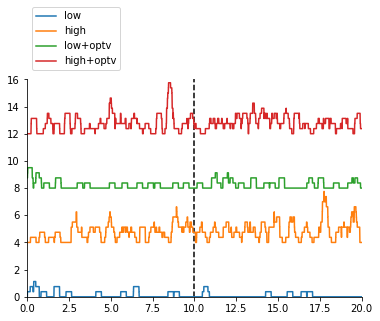

[31, 5, 0.5596958174904942]


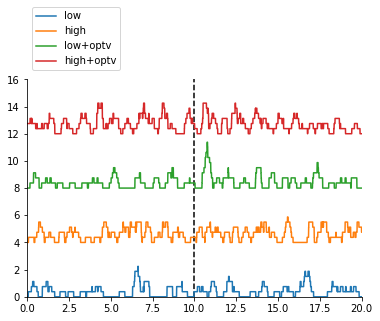

[31, 6, 0.2311787072243346]


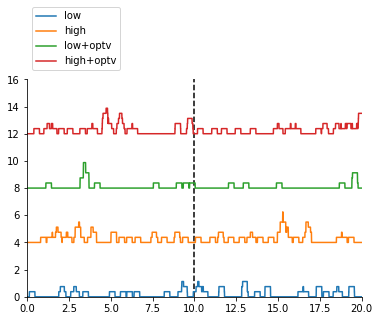

[31, 7, 0.07756653992395438]
[31, 8, 0.021292775665399243]
[31, 9, 0.018250950570342206]
[31, 10, 0.022813688212927757]
[31, 11, 0.08365019011406843]
[31, 12, 0.3467680608365019]


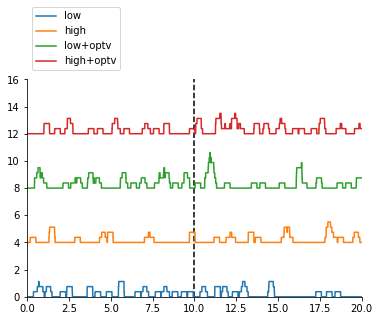

[32, 0, 0.1991890522047643]
[32, 1, 0.501773948302078]


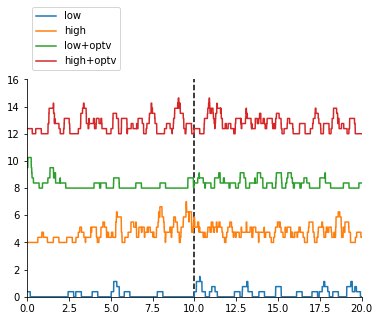

[32, 2, 1.7866193613786112]


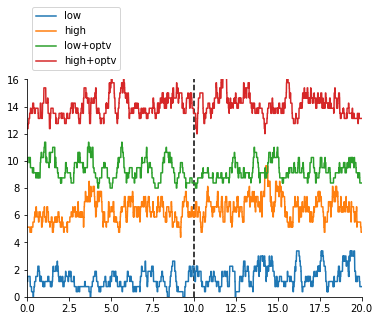

[32, 3, 0.1368474404460213]
[32, 4, 0.24936644703497213]


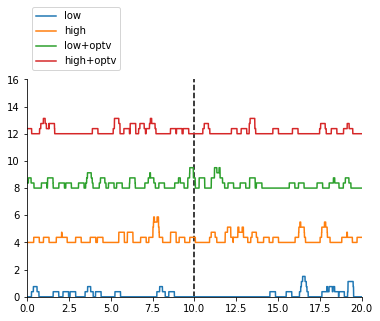

[32, 5, 0.22959959452610237]


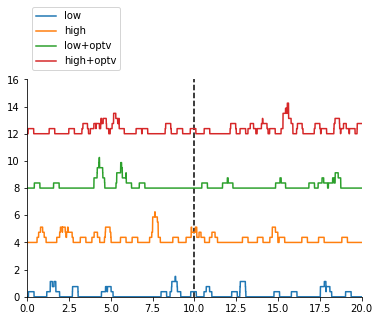

[32, 6, 0.11556006082108464]
[32, 7, 0.15965534718702484]
[32, 8, 0.03649265078560568]
[32, 9, 0.0927521540800811]
[33, 0, 0.7146477445514444]


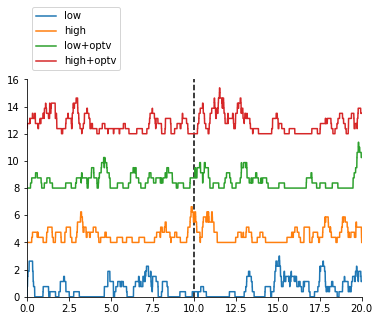

[33, 1, 0.4652812975164724]


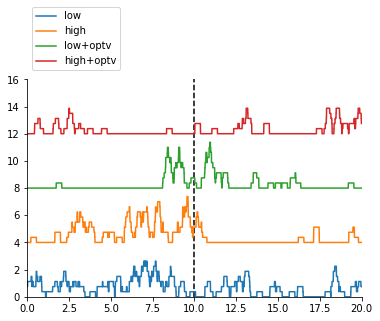

[33, 2, 0.24480486568677143]


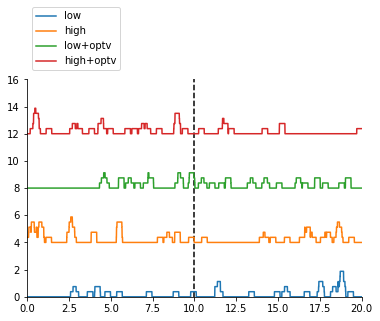

[33, 3, 0.07146477445514446]
[33, 4, 0.10947795235681702]
[33, 5, 0.14597060314242272]


In [8]:
k_ = boxcarKernel(sigma=100)
ave_low_list = []
ave_high_list = []
row_id = -1
for _, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    row_id = row_id+1
    if 'Optovin' not in row['task']:
        continue
    dat_dir = dir_folder/f'{folder}/{fish}/Data/'
    swim_dir = dir_folder/f'{folder}/{fish}/swim/'
    dff = np.load(dat_dir/'Voltr_spikes.npz')['voltrs']
    dff = dff - np.nanmedian(dff, axis=1, keepdims=True)
    spk = np.load(dat_dir/'Voltr_spikes.npz')['spk']
    num_cell = spk.shape[0]
    # spk with padding zeros for the first 2 seconds
    spk = np.r_['-1', np.zeros((num_cell, 600)), spk]
    frame_stimParams = np.load(swim_dir/'frame_stimParams.npy')
    frame_swim_tcourse = np.load(swim_dir/'frame_swim_tcourse.npy')
    gain_ = frame_stimParams[2]
    opto_ = frame_stimParams[5]
    opto_t = np.where(opto_)[0]
    win_size = 4
    for win_ in range(-win_size, win_size+1):
        spk[:, opto_t+win_]=0
    opto_epoch = frame_stimParams[3]
    trial_ = frame_stimParams[4]
    if spk.shape[-1]>len(trial_):
        trial_ = np.concatenate([trial_, np.zeros(spk.shape[-1]-len(trial_))])
    else:
        trial_ = trial_[:spk.shape[-1]]
    num_trial = trial_.max().astype('int')-1
    
    for n_cell in range(spk.shape[0]):
        print([row_id, n_cell, spk[n_cell].mean()*300])
        if spk[n_cell].mean()*300 < 0.2:
            continue
        spk_list = []
        for ntrial in range(num_trial):
            spk_list.append(spk[n_cell, trial_==ntrial+1])
        trial_len = min([_.shape for _ in spk_list])[0]
        spk_list_ = np.vstack([_[:trial_len] for _ in spk_list])
        k_ = boxcarKernel(sigma=100)
        ave_ = spk_list_.mean(axis=0)
        epoch_len = trial_len//4
        labels = ['low', 'high', 'low+optv', 'high+optv']
        for n_epoch in range(4):
            ave_smooth = smooth(ave_[n_epoch*epoch_len:(n_epoch+1)*epoch_len], k_)*300
            plt.plot(np.arange(epoch_len)/300, ave_smooth+4*n_epoch, label=labels[n_epoch])
        plt.vlines([10], [0], [16], linestyles='--', color='k')
        plt.xlim([0, epoch_len/300])
        plt.ylim([0, 16])
        sns.despine()
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3)
        plt.show()

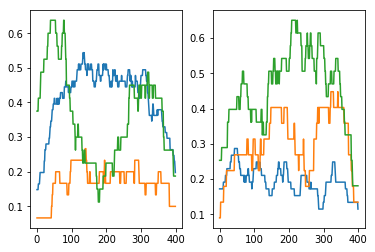

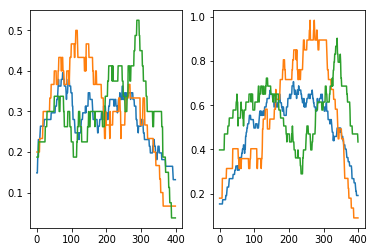

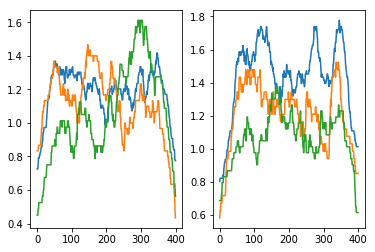

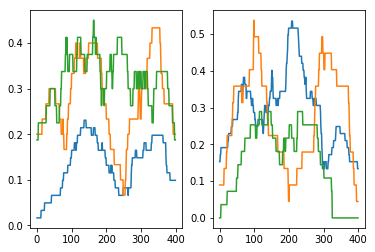

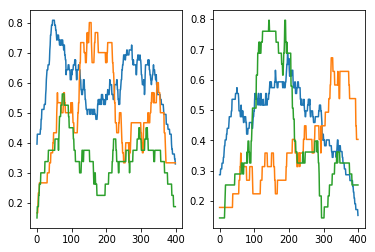

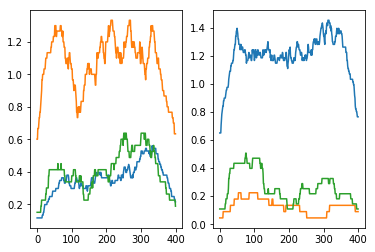

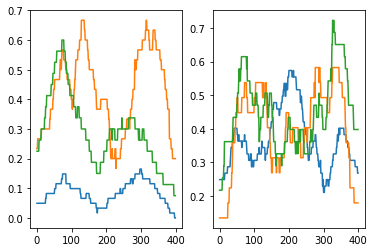

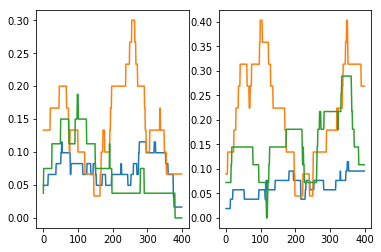

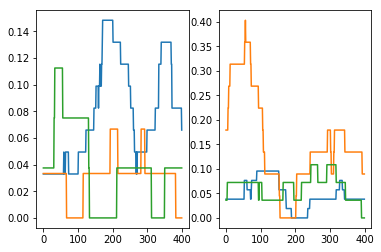

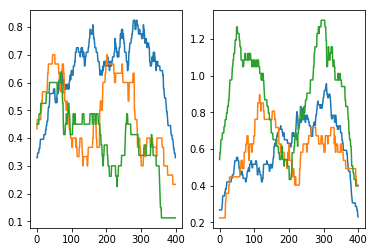

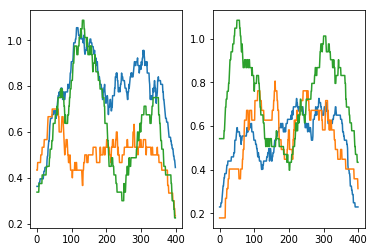

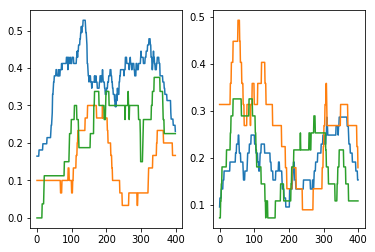

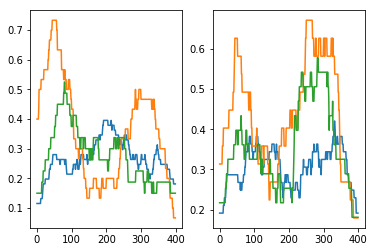

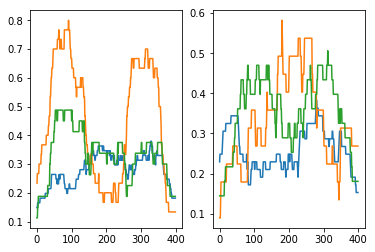

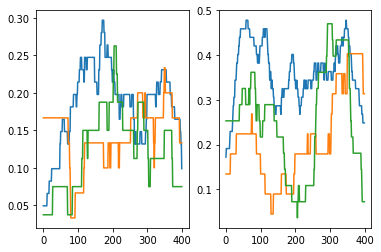

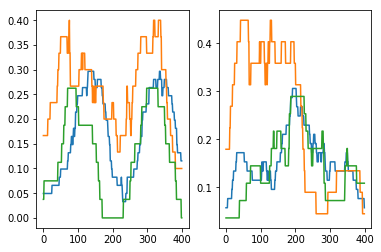

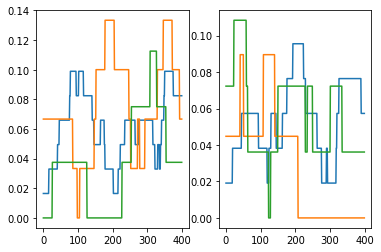

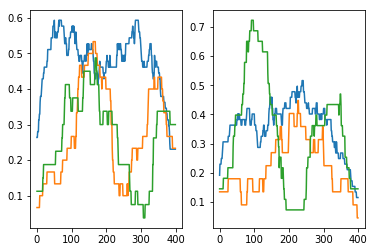

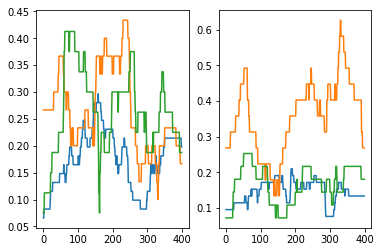

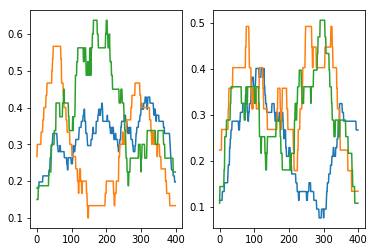

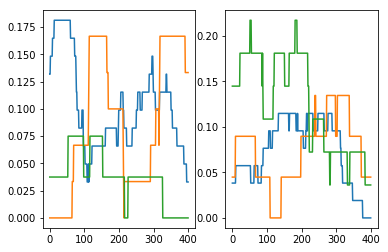

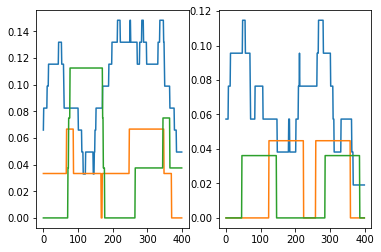

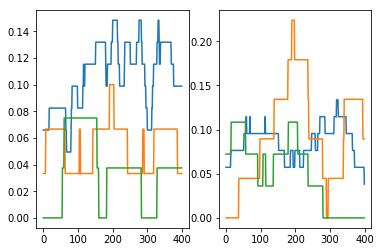

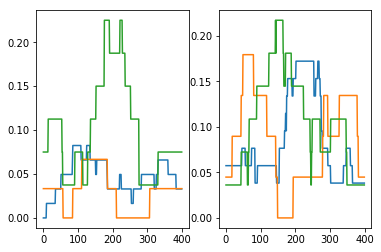

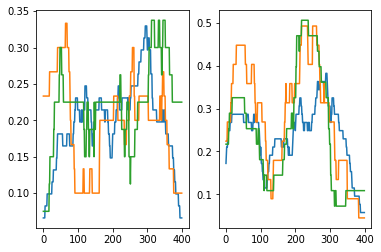

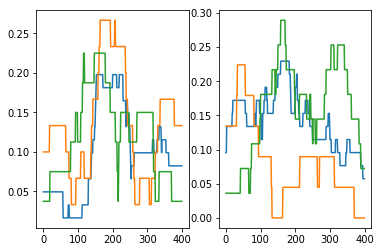

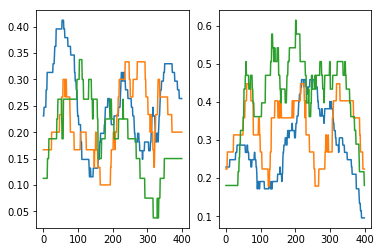

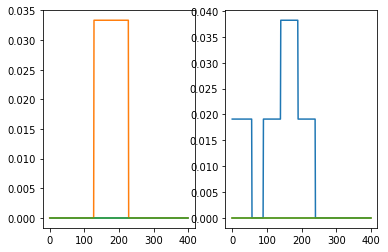

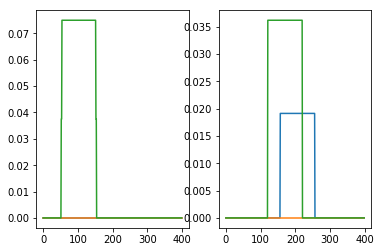

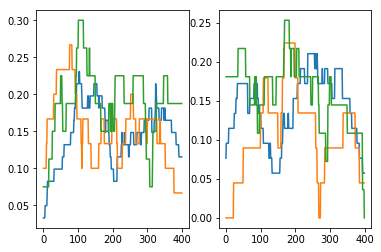

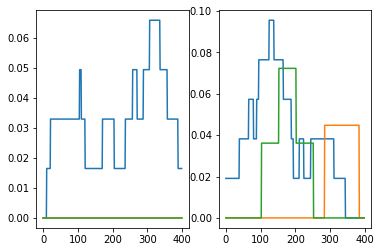

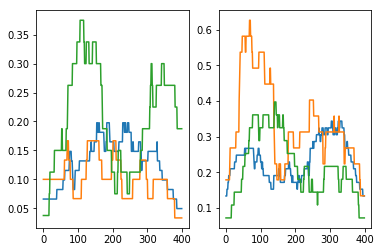

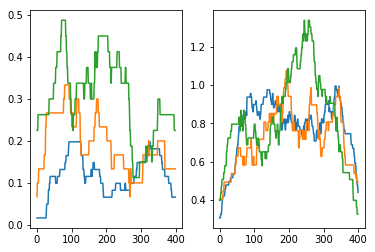

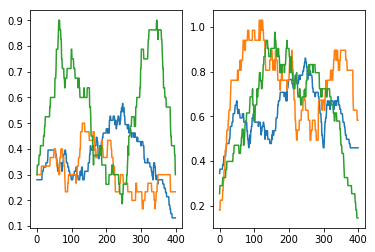

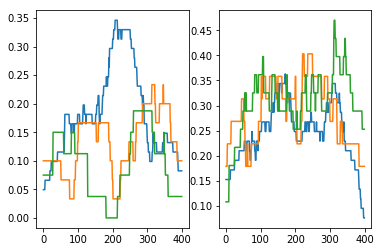

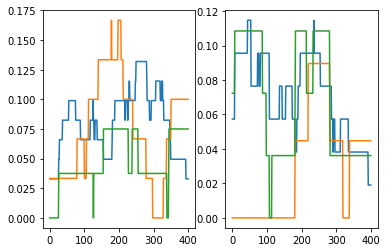

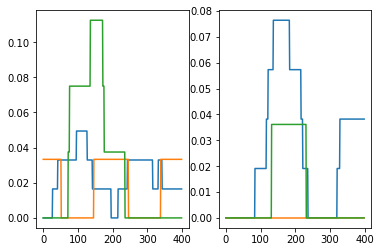

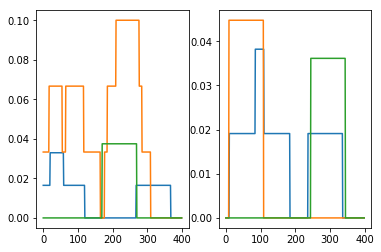

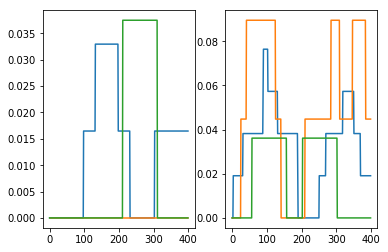

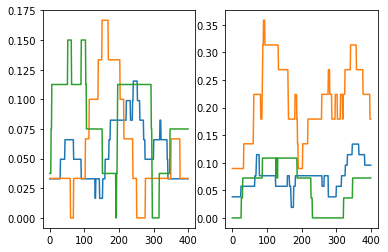

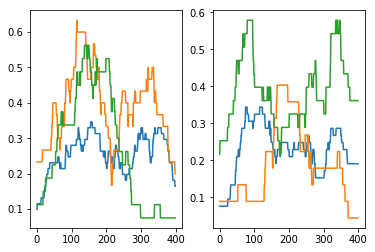

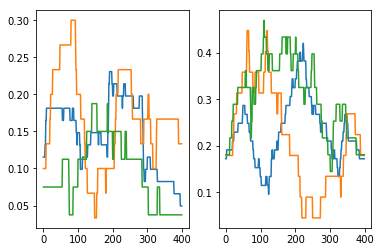

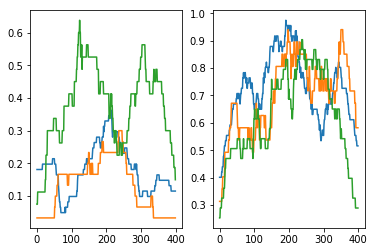

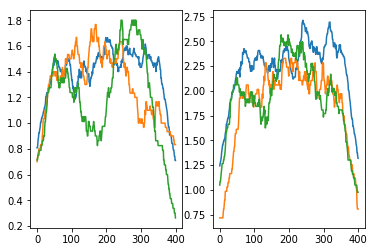

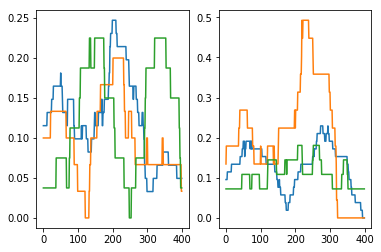

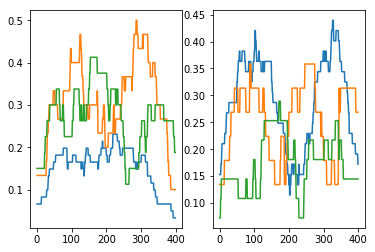

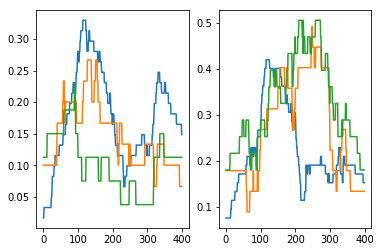

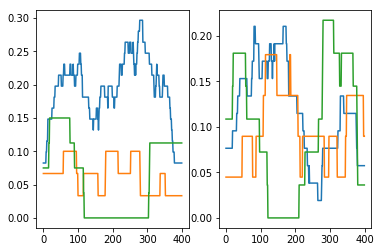

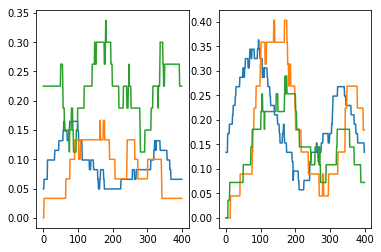

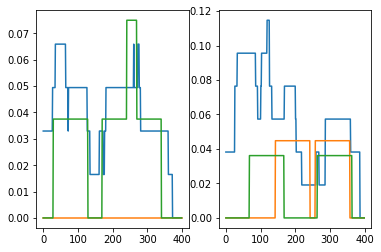

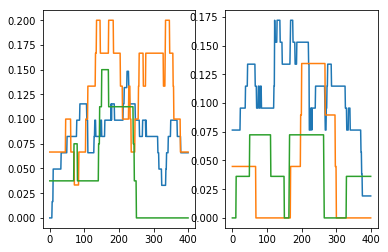

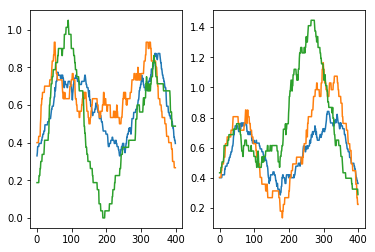

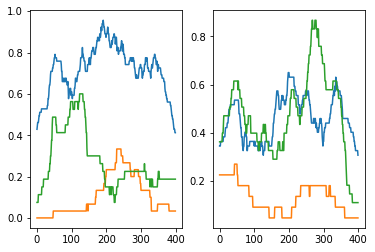

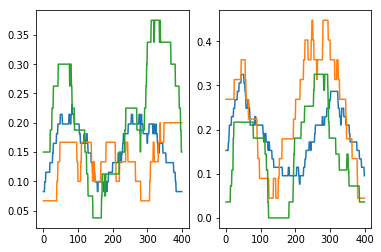

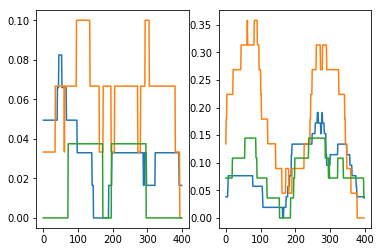

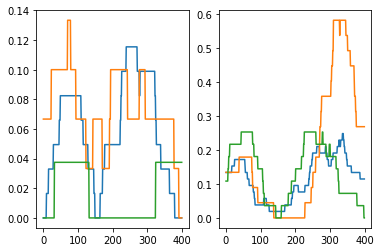

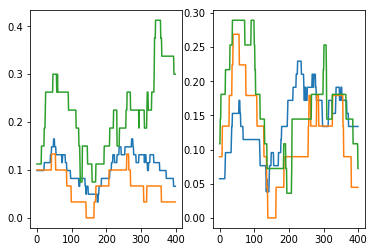

In [9]:
k_ = boxcarKernel(sigma=100)
# row_ = -1
# cell_id = 1
# row = dat_xls_file.iloc[row_]
for _, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    if 'Optovin' not in row['task']:
        continue
    dat_dir = dir_folder/f'{folder}/{fish}/Data/'
    swim_dir = dir_folder/f'{folder}/{fish}/swim/'
    dff = np.load(dat_dir/'Voltr_spikes.npz')['voltrs']
    dff = dff - np.nanmedian(dff, axis=1, keepdims=True)
    spk = np.load(dat_dir/'Voltr_spikes.npz')['spk']
    num_cell = spk.shape[0]
    # spk with padding zeros for the first 2 seconds
    spk = np.r_['-1', np.zeros((num_cell, 600)), spk]
    frame_stimParams = np.load(swim_dir/'frame_stimParams.npy')
    frame_swim_tcourse = np.load(swim_dir/'frame_swim_tcourse.npy')
    gain_ = frame_stimParams[2]
    opto_ = frame_stimParams[5]
    opto_t = np.where(opto_)[0]
    win_size = 4
    for win_ in range(-win_size, win_size+1):
        spk[:, opto_t+win_]=0
    opto_epoch = frame_stimParams[3]
    trial_ = frame_stimParams[4]
    if spk.shape[-1]>len(trial_):
        trial_ = np.concatenate([trial_, np.zeros(spk.shape[-1]-len(trial_))])
    else:
        trial_ = trial_[:spk.shape[-1]]
    num_trial = trial_.max().astype('int')-1

    for n_cell in range(spk.shape[0]):
    #     if n_cell != cell_id:
    #         continue
        spk_list = np.zeros((r_swim.shape[0], 400))
        remove_list = np.zeros(r_swim.shape[0]).astype('bool')
        for n, n_swim in enumerate(swim_starts):
            try:
                spk_list[n, :] = spk[n_cell, n_swim-100:n_swim+300]
            except:
                remove_list[n]=True
        spk_list = spk_list[~remove_list, :]
        _ = []
        for n_ in range(6):
            ave_ = spk_list[task_period==n_+1].mean(axis=0)*300
            _.append(smooth(ave_, k_))
        fig, ax = plt.subplots(1, 2)
        ax[0].plot(np.array(_[0::2]).T)
        ax[1].plot(np.array(_[1::2]).T)
        plt.show()

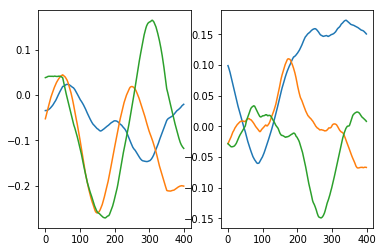

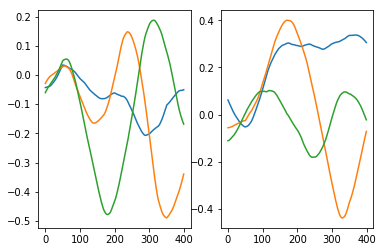

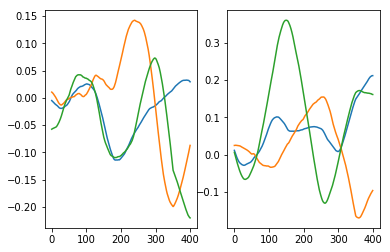

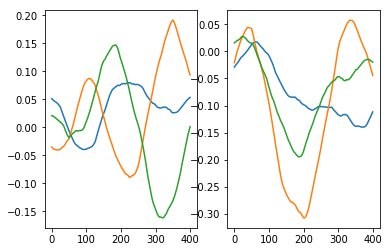

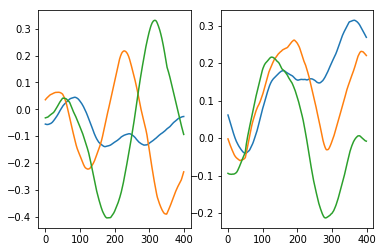

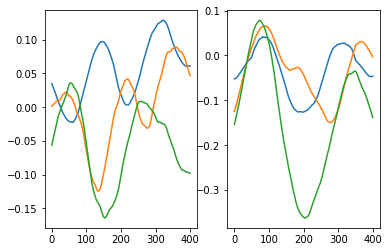

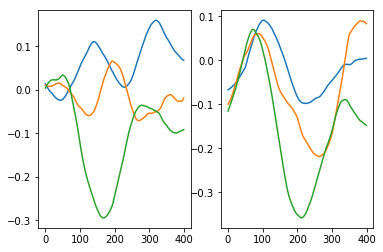

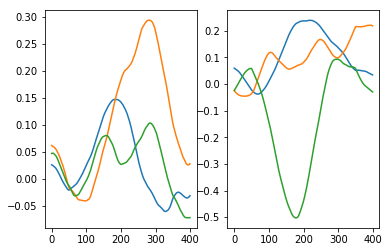

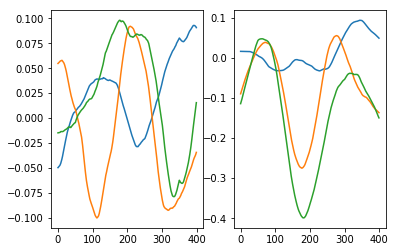

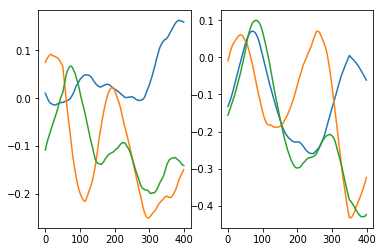

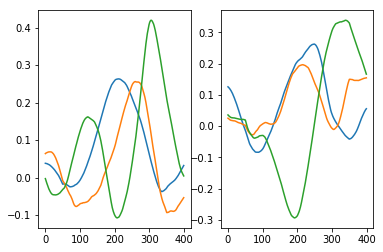

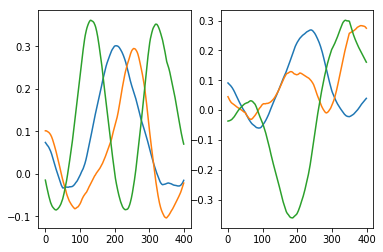

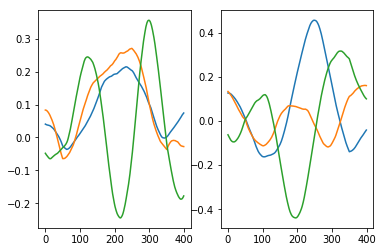

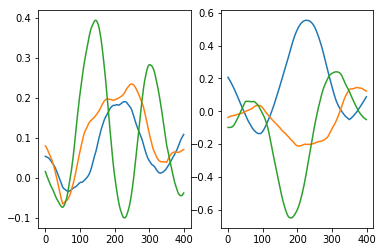

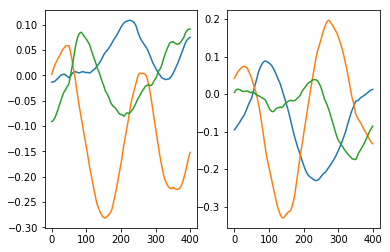

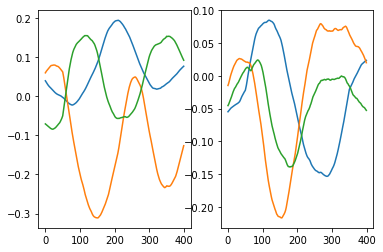

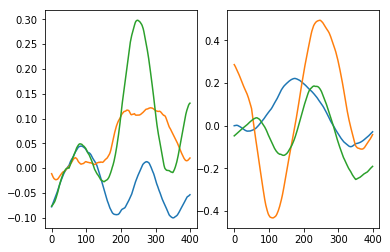

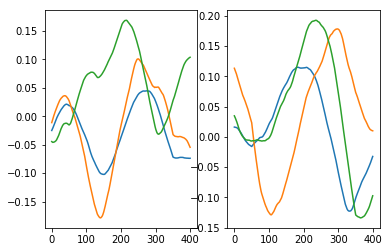

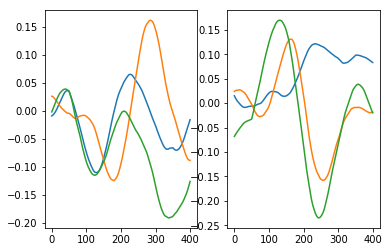

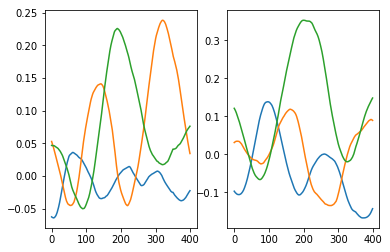

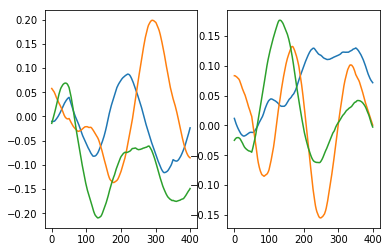

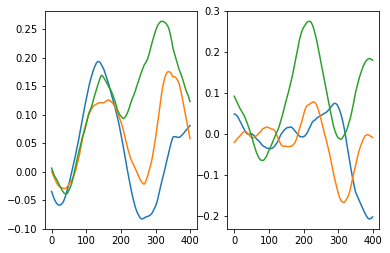

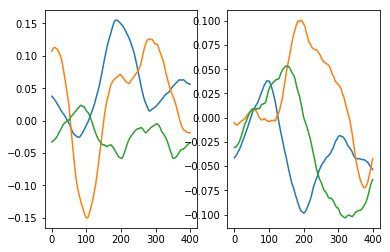

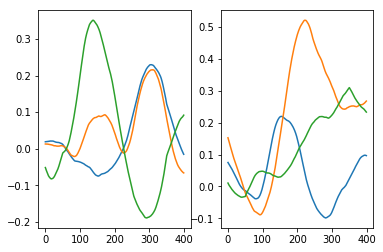

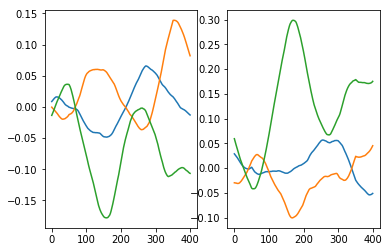

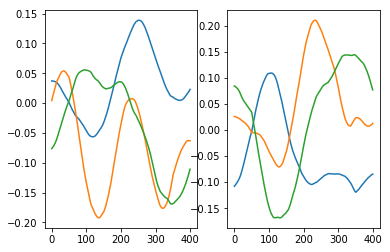

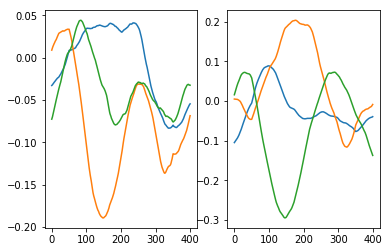

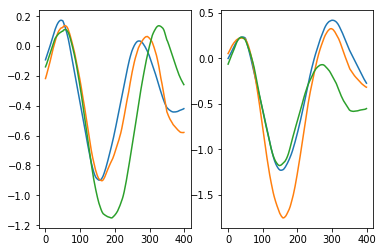

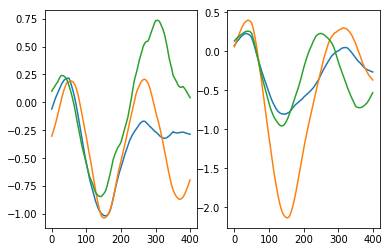

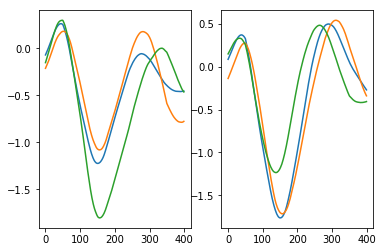

In [14]:
from scipy.signal import medfilt
k_ = boxcarKernel(sigma=100)
# row_ = -1
# cell_id = 1
# row = dat_xls_file.iloc[row_]
for _, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    if 'Optovin' not in row['task']:
        continue
    dat_dir = dir_folder/f'{folder}/{fish}/Data/'
    swim_dir = dir_folder/f'{folder}/{fish}/swim/'
    dff = np.load(dat_dir/'Voltr_spikes.npz')['voltrs']
    dff = dff - np.nanmedian(dff, axis=1, keepdims=True)
    spk = np.load(dat_dir/'Voltr_spikes.npz')['spk']
    num_cell = spk.shape[0]
    # spk with padding zeros for the first 2 seconds
    spk = np.r_['-1', np.zeros((num_cell, 600)), spk]
    frame_stimParams = np.load(swim_dir/'frame_stimParams.npy')
    frame_swim_tcourse = np.load(swim_dir/'frame_swim_tcourse.npy')
    gain_ = frame_stimParams[2]
    opto_ = frame_stimParams[5]
    opto_t = np.where(opto_)[0]
    win_size = 4
    for win_ in range(-win_size, win_size+1):
        spk[:, opto_t+win_]=0
    opto_epoch = frame_stimParams[3]
    trial_ = frame_stimParams[4]
    if spk.shape[-1]>len(trial_):
        trial_ = np.concatenate([trial_, np.zeros(spk.shape[-1]-len(trial_))])
    else:
        trial_ = trial_[:spk.shape[-1]]
    num_trial = trial_.max().astype('int')-1
    
    subvolt = dff.copy()
    for n, ndff in enumerate(dff):
        subvolt[n, :] = medfilt(ndff, kernel_size=51)

    for n_cell in range(spk.shape[0]):
    #     if n_cell != cell_id:
    #         continue
        if spk[n_cell].mean()*300 < 0.2:
                continue
        sub_list = np.zeros((r_swim.shape[0], 400))
        remove_list = np.zeros(r_swim.shape[0]).astype('bool')
        for n, n_swim in enumerate(swim_starts):
            try:
                sub_list[n, :] = subvolt[n_cell, n_swim-100:n_swim+300]
            except:
                remove_list[n]=True
        sub_list = sub_list[~remove_list, :]
        task_period_ = task_period[~remove_list]
        _ = []
        for n_ in range(6):
            ave_ = sub_list[task_period_==n_+1].mean(axis=0)*300
            mean_ = smooth(ave_, k_)
            mean_ = mean_ - mean_[:100].mean()
            _.append(mean_)
        fig, ax = plt.subplots(1, 2)
        ax[0].plot(np.array(_[0::2]).T)
        ax[1].plot(np.array(_[1::2]).T)
        plt.show()